<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Create visualizations using Matplotib, Seaborn and Folium** 

# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data Description">Data Description</a></li>
        </ol>
    </li>
    <li><a href="#Importing Data">Importing data</a></li>
    <li><a href="#Creating Visualizations for Data Analysis">Creating Visualizations for Data Analysis</a></li>
</ol>


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# %pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [ ]:
%pip install seaborn
%pip install folium

### Importing Required Libraries


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")

---


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


#### For your convenience, we have already written code to import the data below.


In [3]:
import requests
import io
import pandas as pd

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data from the URL
response = requests.get(URL)

# Raise an error if the request failed
response.raise_for_status()

# Convert the response content into a readable format for pandas
csv_content = io.StringIO(response.text)

# Read the CSV data into a pandas dataframe
df = pd.read_csv(csv_content)

# Print confirmation
print('Data downloaded and read into a dataframe!')

# Optional: Show the first few rows of the dataframe
print(df.head())


Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


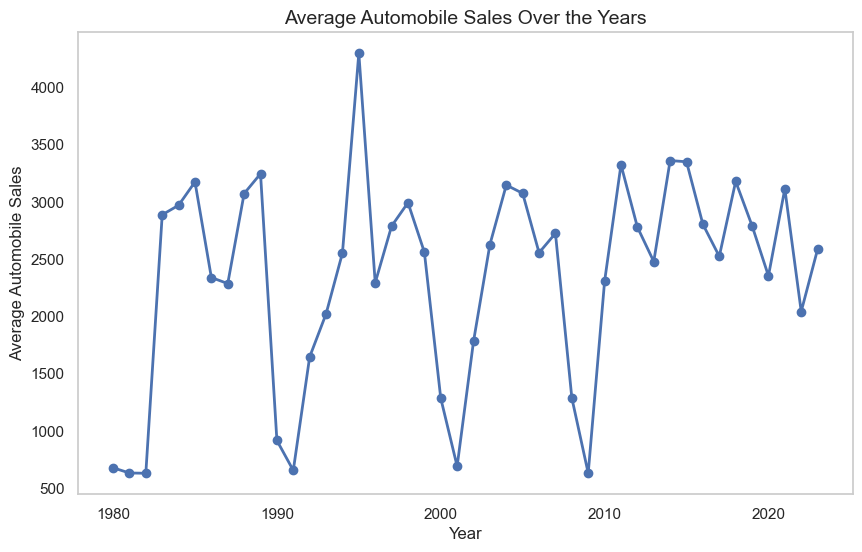

In [9]:
# Create data for plotting: calculate average automobile sales per year
df_line = df.groupby('Year')['Automobile_Sales'].mean()

# Create figure for the line plot
plt.figure(figsize=(10, 6))
df_line.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)
plt.title('Average Automobile Sales Over the Years', fontsize=14)

# Show grid for better readability
plt.grid()

# Display the plot
plt.show()

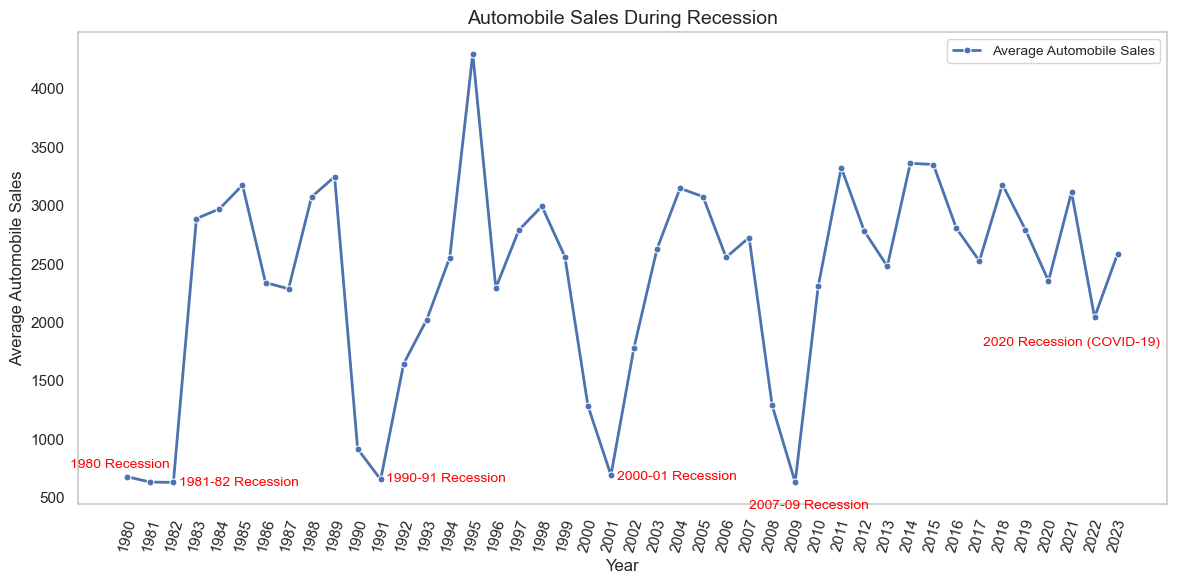

In [13]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create the figure with specified size
plt.figure(figsize=(12, 6))

# Create a line plot for average automobile sales with updated color
sns.lineplot(x=df_line.index, y=df_line.values, marker='o', color='b', linewidth=2, markersize=5)

# Customize x-ticks to show years with rotation for better readability
plt.xticks(list(range(1980, 2024)), rotation=75)

# Add labels and title with appropriate font sizes
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)
plt.title('Automobile Sales During Recession', fontsize=14)

# Annotate recession periods on the plot
recession_texts = [
    (1977.5, 750, '1980 Recession'),
    (1982.25, 600, '1981-82 Recession'),
    (1991.25, 630, '1990-91 Recession'),
    (2001.25, 650, '2000-01 Recession'),
    (2007, 400, '2007-09 Recession'),
    (2021, 1800, '2020 Recession (COVID-19)'),
]

for x, y, text in recession_texts:
    plt.text(x, y, text, fontsize=10, ha='left' if x < 2021 else 'center', color='red')

# Show grid for better readability
plt.grid()

# Add a legend
plt.legend(['Average Automobile Sales'], fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


<Figure size 1200x600 with 0 Axes>

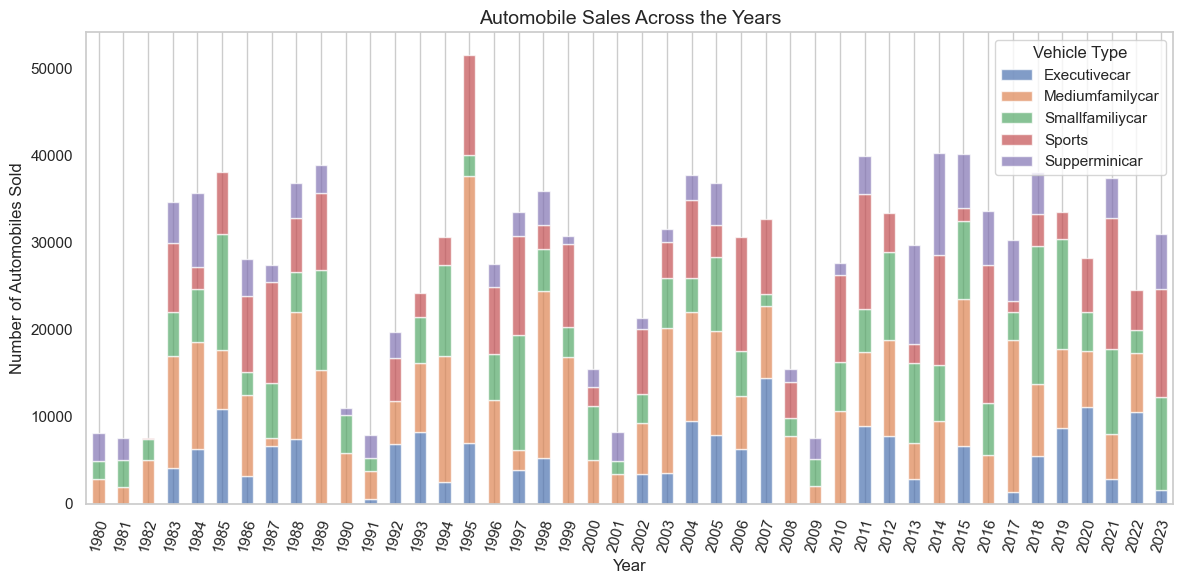

In [17]:
# Assume df is your DataFrame containing 'Year', 'Vehicle_Type', and 'Automobile_Sales'

plt.figure(figsize=(12, 6))

# Group data by Year and Vehicle Type, then sum automobile sales
temp = df.groupby(["Year", "Vehicle_Type"])[["Automobile_Sales"]].sum().reset_index()

# Pivot the DataFrame to get vehicle types as columns
pivoted_data = temp.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales').fillna(0)

# Create a grouped bar plot
pivoted_data.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.7)

# Customize x-ticks for better readability
plt.xticks(rotation=75)

# Add grid and labels
plt.grid(axis='y')
plt.title("Automobile Sales Across the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Automobiles Sold", fontsize=12)

# Add legend with title
plt.legend(title='Vehicle Type')
plt.tight_layout()

# Display the plot
plt.show()

----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


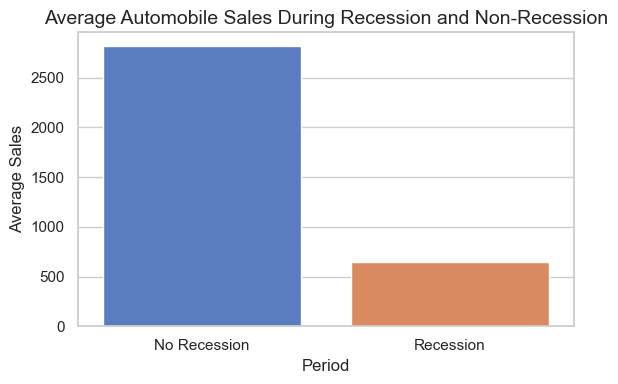

In [27]:
# Group data by recession status and calculate average automobile sales
temp = df.groupby(["Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0: "No Recession", 1: "Recession"})

# Create a bar plot to visualize average sales during recession and non-recession periods
plt.figure(figsize=(6, 4))  # Adjusted figure size for consistency
sns.barplot(data=temp, x="Recession", y="Automobile_Sales", palette="muted")  # Changed to "muted"

# Customize labels and title
plt.xlabel('Period', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.title('Average Automobile Sales During Recession and Non-Recession', fontsize=14)

# Adjust x-ticks and layout for better appearance
plt.xticks(rotation=0)  
plt.tight_layout()

# Display the plot
plt.show()

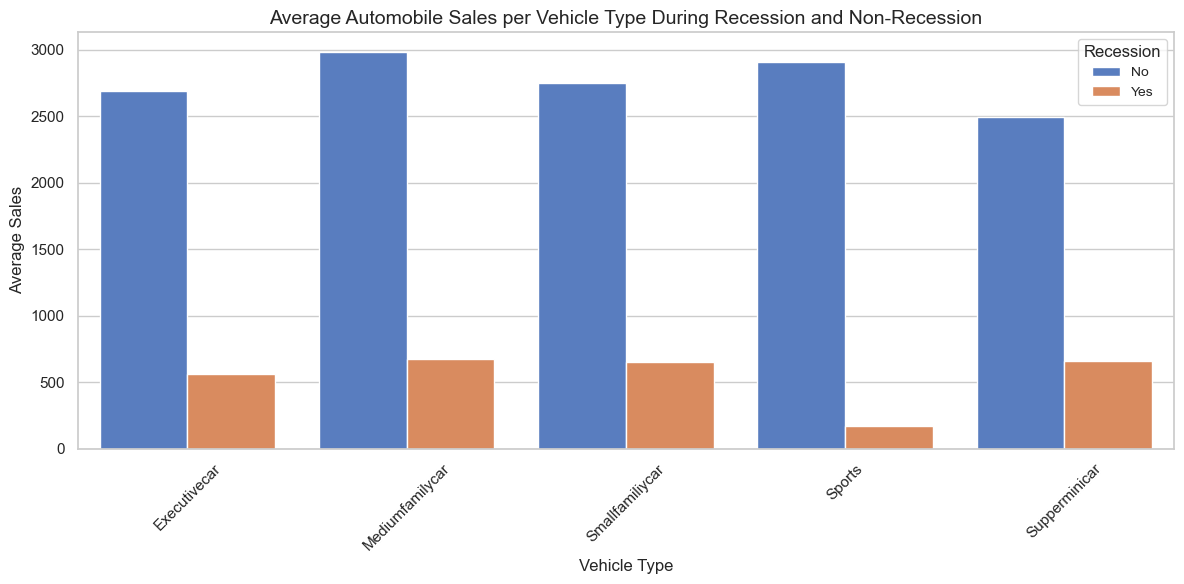

In [28]:
# Group data by vehicle type and recession status, then calculate average automobile sales
temp = df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0: "No", 1: "Yes"})

# Create a bar plot to visualize average sales by vehicle type during recession and non-recession
plt.figure(figsize=(12, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession", palette="muted")  # Used the same palette

# Customize labels and title
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.title('Average Automobile Sales per Vehicle Type During Recession and Non-Recession', fontsize=14)

# Customize x-ticks and legend
plt.xticks(rotation=45)  
plt.legend(title='Recession', fontsize=10)  
plt.tight_layout()

# Display the plot
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period


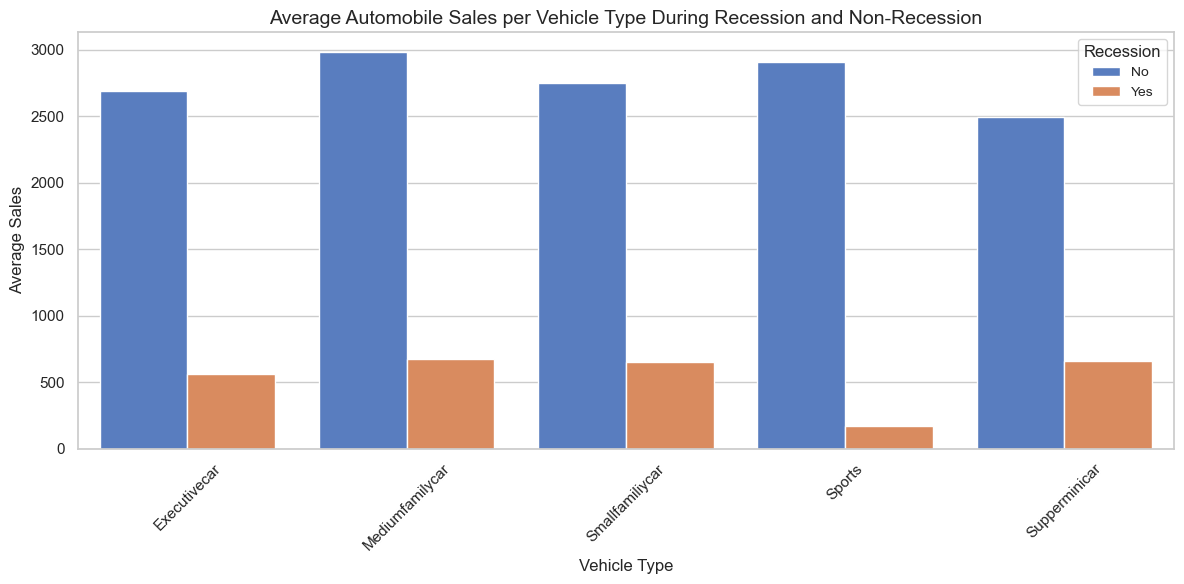

In [24]:
temp = df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0: "No", 1: "Yes"})

plt.figure(figsize=(12, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession", palette="muted")

plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.title('Average Automobile Sales per Vehicle Type During Recession and Non-Recession', fontsize=14)
plt.xticks(rotation=45)  
plt.legend(title='Recession', fontsize=10)  
plt.tight_layout()
plt.show()

---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.


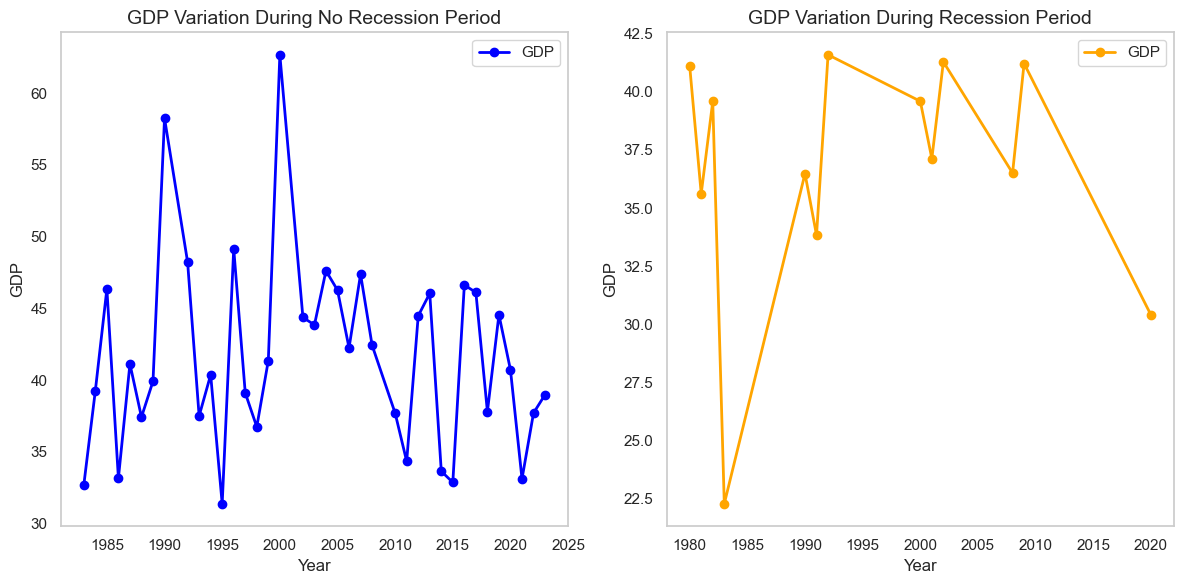

In [30]:
# Group data by recession status and year, then calculate average GDP
temp = df.groupby(["Recession", "Year"])["GDP"].mean().reset_index()
no_recession = temp[temp["Recession"] == 0]
recession = temp[temp["Recession"] == 1]

# Create subplots for GDP variation during recession and non-recession periods
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

# Plot GDP variation for non-recession periods
no_recession.plot(x="Year", y="GDP", kind="line", ax=ax0, marker='o', color='blue', linewidth=2)
ax0.set_title('GDP Variation During No Recession Period', fontsize=14)
ax0.set_ylabel('GDP', fontsize=12)
ax0.set_xlabel('Year', fontsize=12)
ax0.grid()

# Plot GDP variation for recession periods
recession.plot(x="Year", y="GDP", kind="line", ax=ax1, marker='o', color='orange', linewidth=2)
ax1.set_title('GDP Variation During Recession Period', fontsize=14)
ax1.set_ylabel('GDP', fontsize=12)
ax1.set_xlabel('Year', fontsize=12)
ax1.grid()

# Adjust layout for better appearance
plt.tight_layout()

# Display the plots
plt.show()

---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


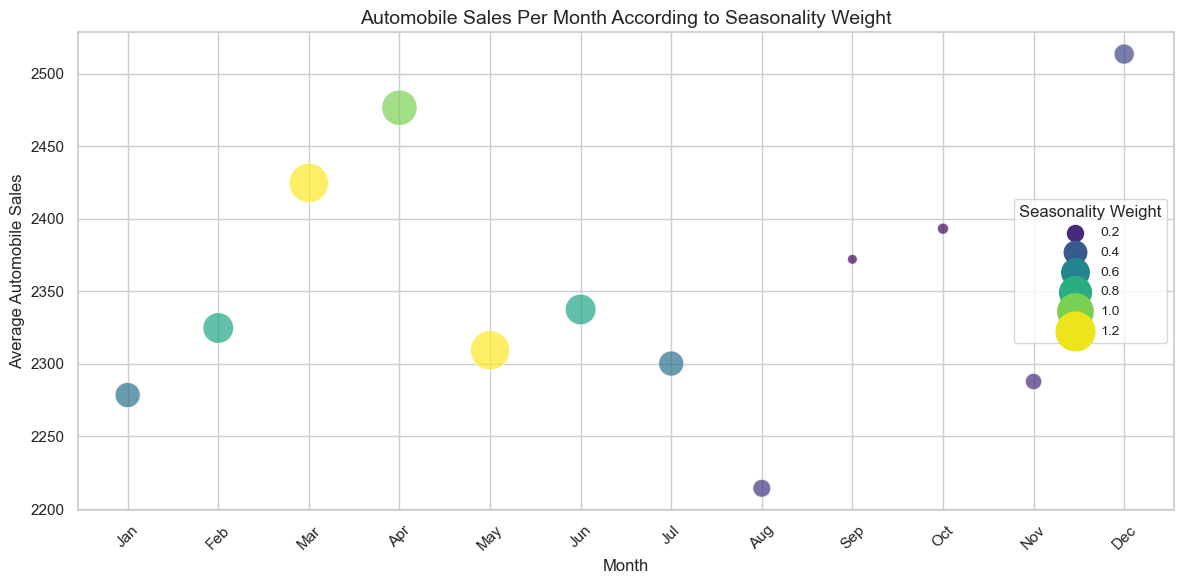

In [31]:
temp = df.copy()
months = temp["Month"].unique().tolist()

temp["Month"] = temp["Month"].replace(dict(zip(months, range(len(months)))))
temp = temp.groupby("Month")[["Automobile_Sales", "Seasonality_Weight"]].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.xticks(ticks=range(len(months)), labels=months, rotation=45)
sns.scatterplot(data=temp,
                x='Month',
                y='Automobile_Sales',
                hue="Seasonality_Weight",
                size="Seasonality_Weight",
                sizes=(50, 800),
                palette="viridis",
                alpha=0.7
               )
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Automobile Sales", fontsize=12)
plt.title("Automobile Sales Per Month According to Seasonality Weight", fontsize=14)
plt.legend(title="Seasonality Weight", loc="right", fontsize=10)
plt.tight_layout()
plt.show()

---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


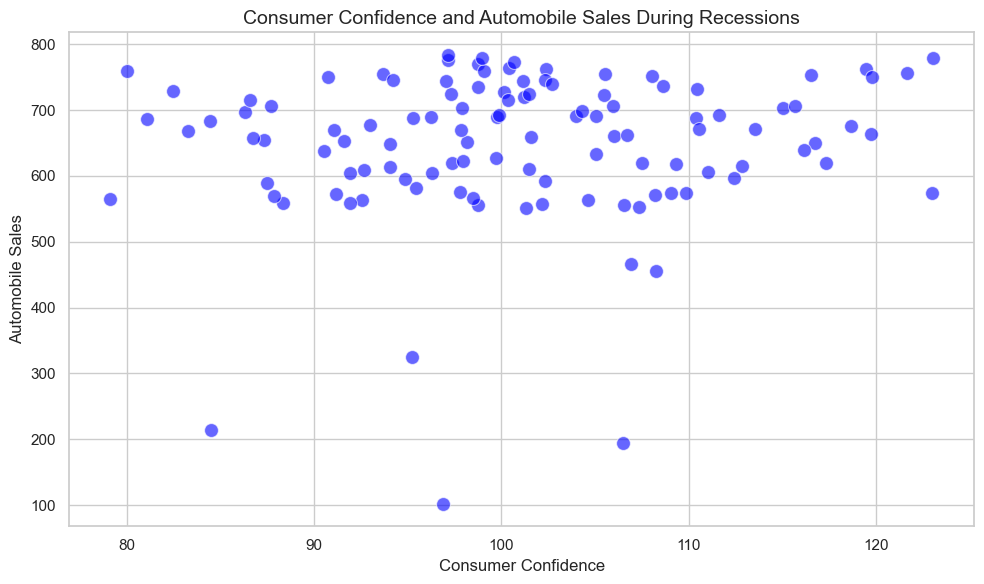

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"] == 1], x='Consumer_Confidence', y='Automobile_Sales', 
                 color='blue', alpha=0.6, edgecolor='w', s=100)

plt.title("Consumer Confidence and Automobile Sales During Recessions", fontsize=14)
plt.xlabel("Consumer Confidence", fontsize=12)
plt.ylabel("Automobile Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


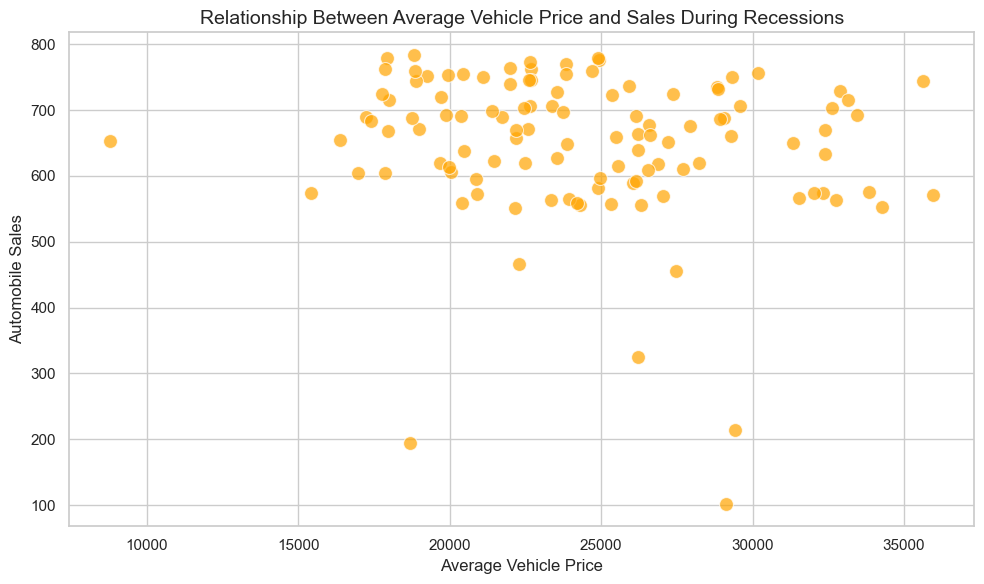

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"] == 1], x='Price', y='Automobile_Sales',
                 color='orange', alpha=0.7, edgecolor='w', s=100)

plt.title("Relationship Between Average Vehicle Price and Sales During Recessions", fontsize=14)
plt.xlabel("Average Vehicle Price", fontsize=12)
plt.ylabel("Automobile Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


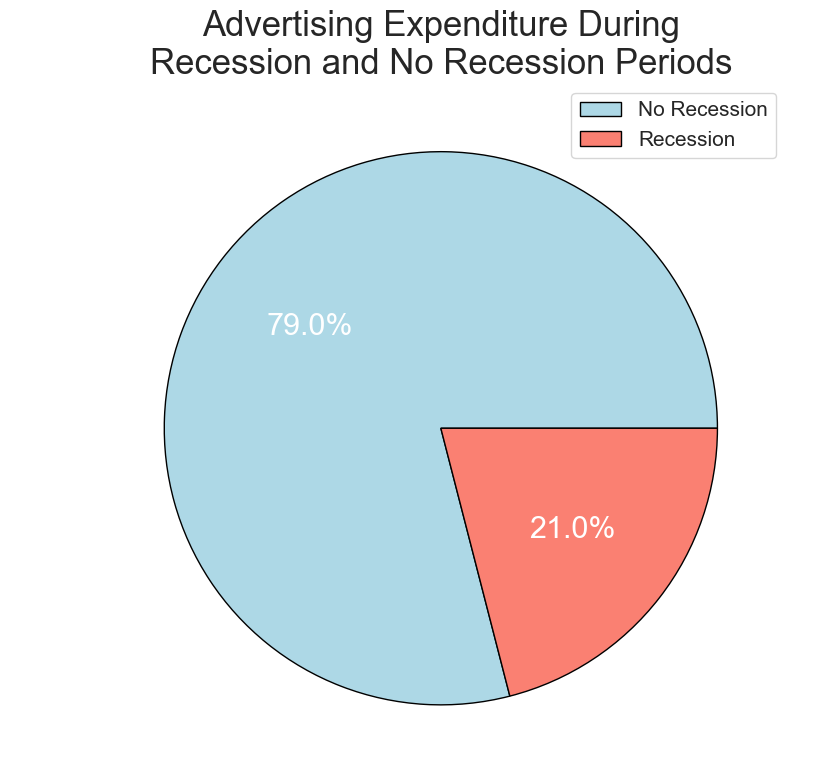

In [34]:
temp = df.groupby("Recession")["Advertising_Expenditure"].sum() / df["Advertising_Expenditure"].sum()
temp.index = ["No Recession", "Recession"]

plt.figure(figsize=(12, 8))
temp.plot(kind="pie",
          autopct='%1.1f%%',
          textprops={'color': "white", "size": 22},
          colors=['lightblue', 'salmon'],
          wedgeprops={'edgecolor': 'black'}
         )

plt.ylabel('', fontsize=20)
plt.title("Advertising Expenditure During\nRecession and No Recession Periods", fontsize=25)
plt.legend(temp.index, fontsize=15)
plt.tight_layout()
plt.show()

#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-


---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


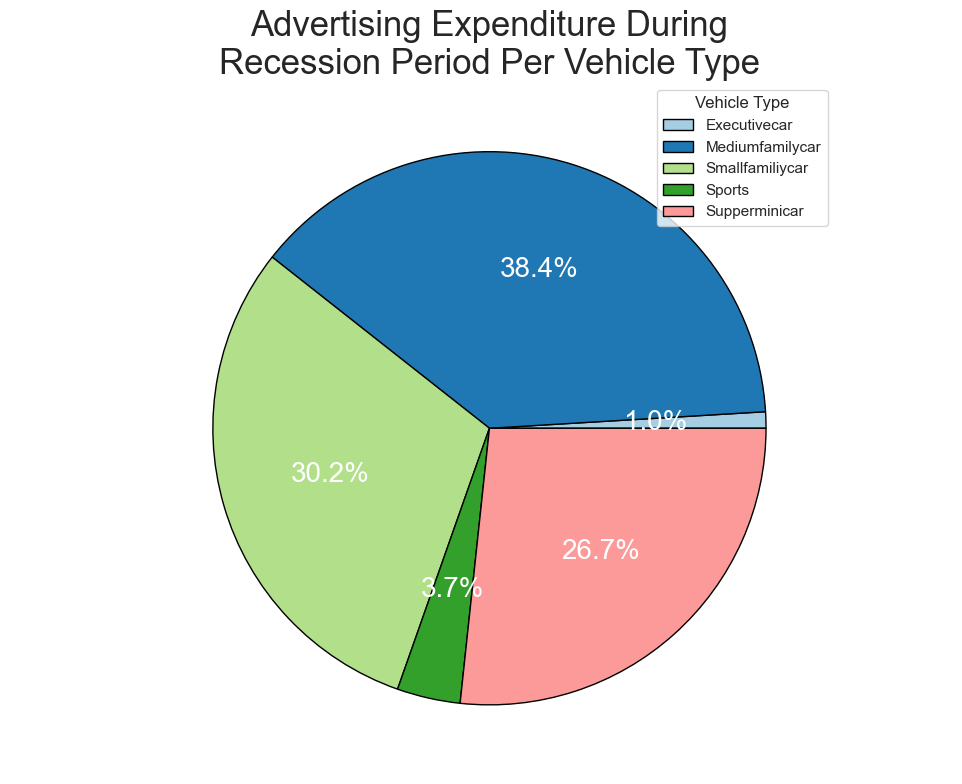

In [35]:
temp = df[df["Recession"] == 1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()

plt.figure(figsize=(12, 8))
temp.plot(kind="pie",
          autopct='%1.1f%%',
          textprops={'color': "white", "size": 20},
          colors=plt.cm.Paired.colors,  
          wedgeprops={'edgecolor': 'black'}
         )

plt.ylabel('', fontsize=20)
plt.title("Advertising Expenditure During\nRecession Period Per Vehicle Type", fontsize=25)
plt.legend(title="Vehicle Type", loc="best", fontsize=11)
plt.tight_layout()
plt.show()

----


# Congratulations! You have completed the lab


## Authors


[Dr. Pooja](author_link)


``` toggle ## Change Log
```


<!---|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
2024-01-05|0.2.1|Sowmyaa Gurusamy|Updated the lab instructions|
|2023-06-17|0.2|Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|-->


Copyright © 2023 IBM Corporation. All rights reserved.
